***CNN - Classification of Shoes***

**Goal:** Given the images of a product with multiple categories, train a model which can classify the type of a product.

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/Colab Notebooks/' 
train_data = root+'CNN TEST/Shoe Classification/train'
test_data = root+'CNN TEST/Shoe Classification/test' 

''' initializing some variables '''
img_h = 128
img_w = 128
bs = 10

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
''' reading images from train directory '''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_data, seed=123, image_size=(img_h, img_w), 
                                                               batch_size=bs)

Found 778 files belonging to 3 classes.


In [ ]:
''' classes names '''
c_names = train_ds.class_names
print(c_names)

['Boots', 'Sandals', 'Slippers']


In [ ]:
''' reading images from test directory '''
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_data, seed=123, image_size=(img_h, img_w), 
                                                              batch_size=bs)

Found 89 files belonging to 1 classes.


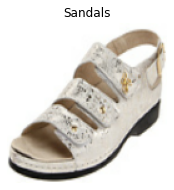

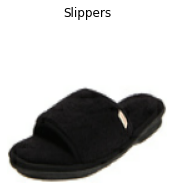

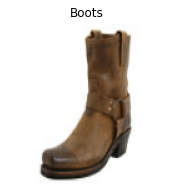

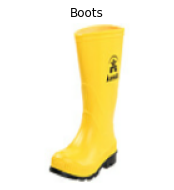

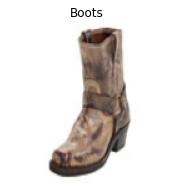

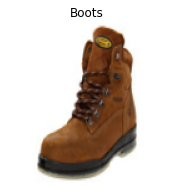

In [ ]:
''' plotting some images '''

''' taaking one batch '''
for img, lbl in train_ds.take(1):
    ''' plotting 9 images '''
    for i in range(9):
        plt.figure(figsize=(10, 10))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(c_names[lbl[i]])
        plt.axis("off")

In [ ]:
model = tf.keras.models.Sequential()
''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
''' flattening '''
model.add(tf.keras.layers.Flatten())
''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
''' classification layer '''
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
''' training '''
history=model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
78/78 [==============================] - 17s 210ms/step - loss: -460.5753 - accuracy: 0.5823 - val_loss: 16706.5176 - val_accuracy: 0.2135
Epoch 2/25
78/78 [==============================] - 17s 211ms/step - loss: -44887.0742 - accuracy: 0.6157 - val_loss: 745164.3750 - val_accuracy: 0.1685
Epoch 3/25
78/78 [==============================] - 16s 209ms/step - loss: -1143450.8750 - accuracy: 0.6131 - val_loss: 11859933.0000 - val_accuracy: 0.2809
Epoch 4/25
78/78 [==============================] - 16s 208ms/step - loss: -9609021.0000 - accuracy: 0.6157 - val_loss: 72320600.0000 - val_accuracy: 0.2584
Epoch 5/25
78/78 [==============================] - 16s 207ms/step - loss: -38199916.0000 - accuracy: 0.6054 - val_loss: 232003520.0000 - val_accuracy: 0.2809
Epoch 6/25
78/78 [==============================] - 16s 208ms/step - loss: -112602072.0000 - accuracy: 0.6157 - val_loss: 649519040.0000 - val_accuracy: 0.2809
Epoch 7/25
78/78 [==============================] - 16s 209ms/st

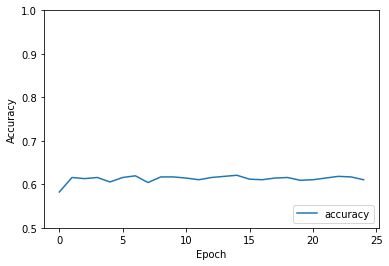

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
